# WORKING DOC

### Import Libraries and Dependencies

In [66]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import hvplot.pandas

warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [67]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {kraken_public_key}")
print(f"Kraken secren data type: {kraken_secret_key}")

Kraken key data type: nGws9fAsOY5TMzDpGbCHs8jDXhuUFkLAkwR1qwZw08lkxS27IFs15JAG
Kraken secren data type: B3TTZY6YQm2NJwp2EhyIXjPdHFIx4NPbwvgRyS5gORiShOFqBvYV7kRsPI7YuUke3Yf4U4VobBMNT5ag2DKwUQ==


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [68]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

### List Available Cryptocurrencies for Trading

### Fetch Historical Data for LINK/USDT

In [69]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1d")
historical_prices[10]

[1603584000000, 12.57089, 12.82563, 11.87094, 12.16142, 919.67794996]

In [57]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1602720000000,10.70000,10.77000,10.67489,10.77000,152.510069
1,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401
2,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525
3,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062
4,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948


'____________________________________'

'historical_prices_df shape: (232, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [70]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date,daily_return,bollinger_mid_band,bollinger_std,...,bollinger_short,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal
1,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,2020-10-16,-0.011142,NaN,NaN,...,0.0,0.0,10.650000,10.650000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17,-0.006369,NaN,NaN,...,0.0,0.0,10.639565,10.644976,-0.005411,-0.001082,-0.004329,0.0,-1.0,-1.0
3,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18,0.030731,NaN,NaN,...,0.0,0.0,10.680765,10.664412,0.016353,0.002405,0.013948,1.0,0.0,1.0
4,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19,-0.001328,NaN,NaN,...,0.0,0.0,10.713400,10.681336,0.032064,0.008337,0.023727,1.0,0.0,1.0
5,1603152000000,10.84422,10.84422,9.81666,9.81666,8063.562627,2020-10-20,-0.098801,NaN,NaN,...,0.0,0.0,10.575440,10.617286,-0.041846,-0.001700,-0.040146,0.0,-1.0,-1.0


'_________________________'

'historical_prices_df shape: (231, 23)'

In [11]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2020-10-15,1602720000000,10.70000,10.77000,10.67489,10.77000,152.510069,2020-10-15
2020-10-16,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,2020-10-16
2020-10-17,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17
2020-10-18,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18
2020-10-19,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19
...,...,...,...,...,...,...,...
2021-05-30,1622332800000,25.18917,29.10571,23.75893,26.76105,48007.786240,2021-05-30
2021-05-31,1622419200000,26.78231,32.09140,25.64723,32.09140,60506.920034,2021-05-31
2021-06-01,1622505600000,31.91397,32.53629,29.05471,30.70134,41418.194124,2021-06-01


### Plot Daily Returns

In [71]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return,bollinger_mid_band,bollinger_std,...,bollinger_short,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal
20,1604448000000,10.26869,10.72048,9.79000,10.47369,4574.284689,2020-11-04,0.002439,11.250609,0.735231,...,0.0,1.0,11.095520,11.100529,-0.005009,0.149096,-0.154105,0.0,-1.0,-1.0
21,1604534400000,10.51374,11.24761,10.13651,10.99343,10851.563346,2020-11-05,0.049623,11.267781,0.724396,...,0.0,0.0,11.079814,11.092596,-0.012782,0.116720,-0.129502,0.0,-1.0,-1.0
22,1604620800000,11.03000,12.96660,11.03000,12.10049,3667.469079,2020-11-06,0.100702,11.343697,0.728311,...,-1.0,-1.0,11.236841,11.167255,0.069586,0.107293,-0.037707,0.0,-1.0,-1.0
23,1604707200000,12.37333,13.41661,11.50000,11.84772,8003.792164,2020-11-07,-0.020889,11.390714,0.729013,...,0.0,0.0,11.330823,11.217660,0.113163,0.108467,0.004696,1.0,0.0,1.0
24,1604793600000,11.57141,13.05572,11.50000,12.78295,6825.715837,2020-11-08,0.078938,11.485218,0.781686,...,-1.0,-1.0,11.554227,11.333607,0.220620,0.130898,0.089722,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1622332800000,25.18917,29.10571,23.75893,26.76105,48007.786240,2021-05-30,0.055623,33.341955,8.626119,...,0.0,0.0,29.505448,33.040109,-3.534661,-3.032426,-0.502235,0.0,-1.0,-1.0
228,1622419200000,26.78231,32.09140,25.64723,32.09140,60506.920034,2021-05-31,0.199183,32.506366,7.821490,...,0.0,0.0,29.903287,32.969834,-3.066548,-3.039251,-0.027297,0.0,-1.0,-1.0
229,1622505600000,31.91397,32.53629,29.05471,30.70134,41418.194124,2021-06-01,-0.043316,31.980149,7.553432,...,0.0,0.0,30.026064,32.801798,-2.775734,-2.986547,0.210813,1.0,0.0,1.0
230,1622592000000,30.70134,32.12980,29.73269,30.86564,24321.482985,2021-06-02,0.005352,31.366318,7.082767,...,0.0,0.0,30.155230,32.658379,-2.503149,-2.889868,0.386719,1.0,0.0,1.0


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [72]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,bollinger_mid_band,bollinger_std,...,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
20,1604448000000,10.26869,10.72048,9.79000,10.47369,4574.284689,2020-11-04,0.002439,11.250609,0.735231,...,10.473690,10.473690,10.473690,10.473690,0.0,0.0,0.0,0.0,0.0,0.0
21,1604534400000,10.51374,11.24761,10.13651,10.99343,10851.563346,2020-11-05,0.049623,11.267781,0.724396,...,10.743562,10.738063,10.735361,10.734010,1.0,0.0,1.0,1.0,0.0,1.0
22,1604620800000,11.03000,12.96660,11.03000,12.10049,3667.469079,2020-11-06,0.100702,11.343697,0.728311,...,11.231119,11.208032,11.196727,11.191083,1.0,0.0,1.0,1.0,0.0,1.0
23,1604707200000,12.37333,13.41661,11.50000,11.84772,8003.792164,2020-11-07,-0.020889,11.390714,0.729013,...,11.403507,11.376361,11.362875,11.356097,1.0,0.0,1.0,1.0,0.0,1.0
24,1604793600000,11.57141,13.05572,11.50000,12.78295,6825.715837,2020-11-08,0.078938,11.485218,0.781686,...,11.723438,11.677508,11.654818,11.643449,1.0,0.0,1.0,1.0,0.0,1.0


In [18]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'date',
       'daily_return', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200',
       'crossover_long_9v20', 'crossover_short_9v20', 'crossover_signal_9v20',
       'crossover_long_50v200', 'crossover_short_50v200',
       'crossover_signal_50v200'],
      dtype='object')


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:>

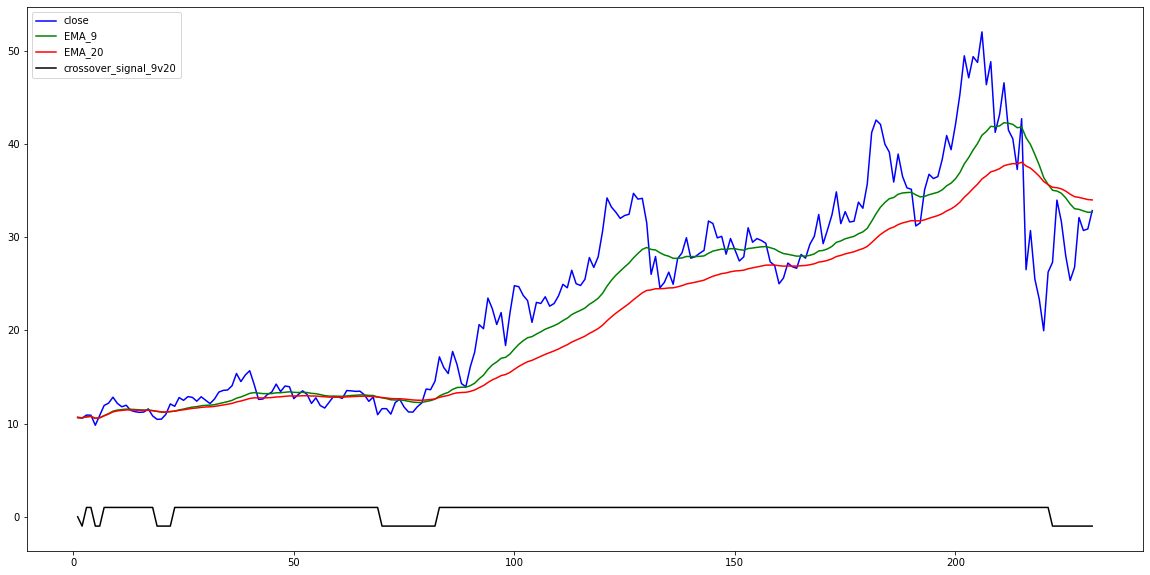

In [45]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'k'])

<AxesSubplot:>

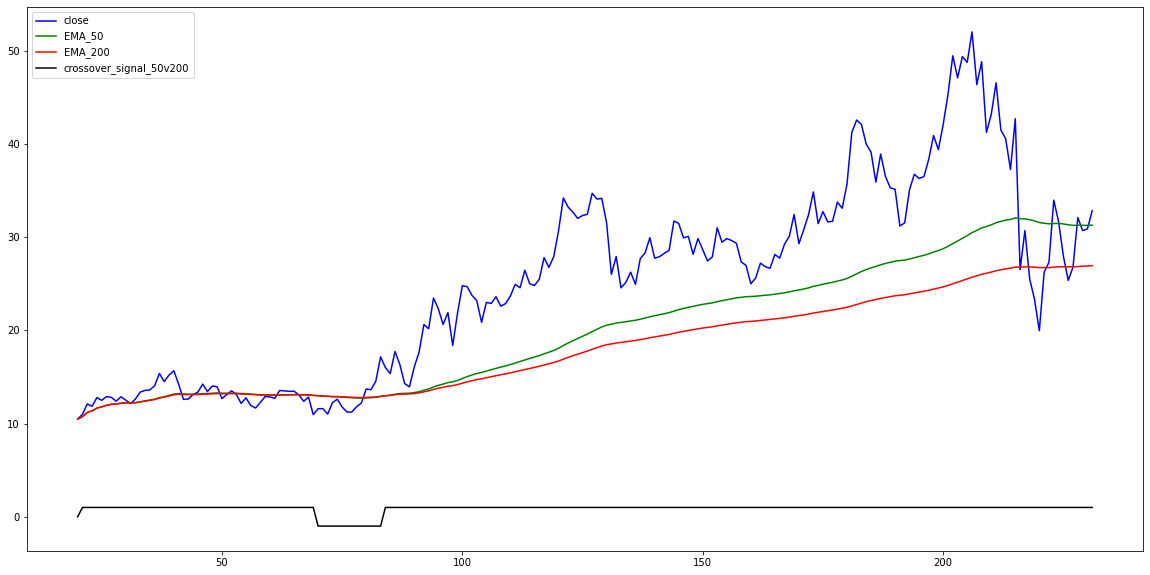

In [73]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'k'])

<AxesSubplot:>

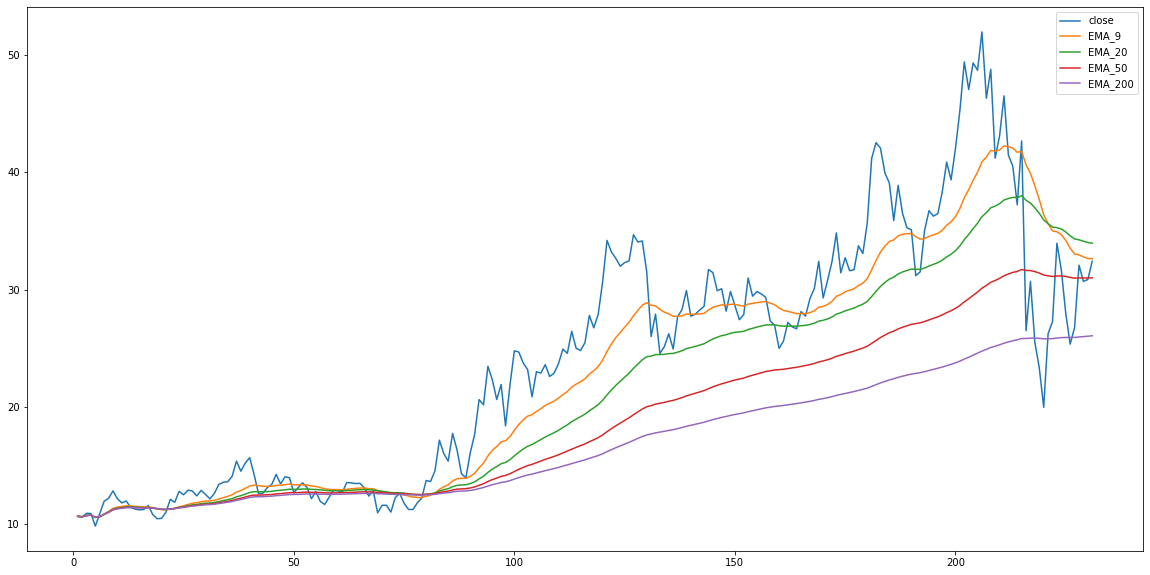

In [16]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [74]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,date,daily_return,bollinger_mid_band,bollinger_std,...,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
70,1608768000000,10.87680,11.64627,9.95000,11.59188,15128.233966,2020-12-24,0.058924,12.686919,0.735139,...,12.778907,12.933628,12.977869,12.984009,0.0,-1.0,-1.0,0.0,-1.0,-1.0
71,1608854400000,11.51006,11.90597,11.10316,11.59697,11428.940082,2020-12-25,0.000439,12.611423,0.766598,...,12.689669,12.879104,12.940859,12.954910,0.0,-1.0,-1.0,0.0,-1.0,-1.0
72,1608940800000,11.62824,11.63653,10.68275,11.00903,11038.916496,2020-12-26,-0.050698,12.486448,0.814871,...,12.562953,12.803330,12.889748,12.914790,0.0,-1.0,-1.0,0.0,-1.0,-1.0
73,1609027200000,10.90203,13.45999,10.21000,12.25305,35925.022309,2020-12-27,0.113000,12.443353,0.802581,...,12.539616,12.781176,12.873114,12.901376,0.0,-1.0,-1.0,0.0,-1.0,-1.0
74,1609113600000,12.08893,12.91756,11.99993,12.60450,20956.287605,2020-12-28,0.028683,12.465742,0.800407,...,12.544496,12.774107,12.866182,12.895458,0.0,-1.0,-1.0,0.0,-1.0,-1.0
75,1609200000000,12.79919,13.00000,10.85575,11.76935,22783.996194,2020-12-29,-0.066258,12.416389,0.811890,...,12.486258,12.734143,12.838214,12.873372,0.0,-1.0,-1.0,0.0,-1.0,-1.0
76,1609286400000,11.80439,12.04000,10.60000,11.24000,21076.580596,2020-12-30,-0.044977,12.382039,0.847440,...,12.392719,12.675051,12.797933,12.841848,0.0,-1.0,-1.0,0.0,-1.0,-1.0
77,1609372800000,11.14933,11.71211,11.00000,11.22610,8105.677495,2020-12-31,-0.001237,12.360344,0.872093,...,12.305239,12.618059,12.758765,12.811150,0.0,-1.0,-1.0,0.0,-1.0,-1.0
78,1609459200000,11.12903,12.38364,11.12903,11.80000,10423.666983,2021-01-01,0.051122,12.336688,0.880955,...,12.267385,12.586051,12.735137,12.792233,0.0,-1.0,-1.0,0.0,-1.0,-1.0
79,1609545600000,11.76725,12.41349,11.48000,12.20346,21412.748137,2021-01-02,0.034192,12.302046,0.871362,...,12.262600,12.571157,12.722175,12.781383,0.0,-1.0,-1.0,0.0,-1.0,-1.0


### Plot Bollinger Bands

<AxesSubplot:>

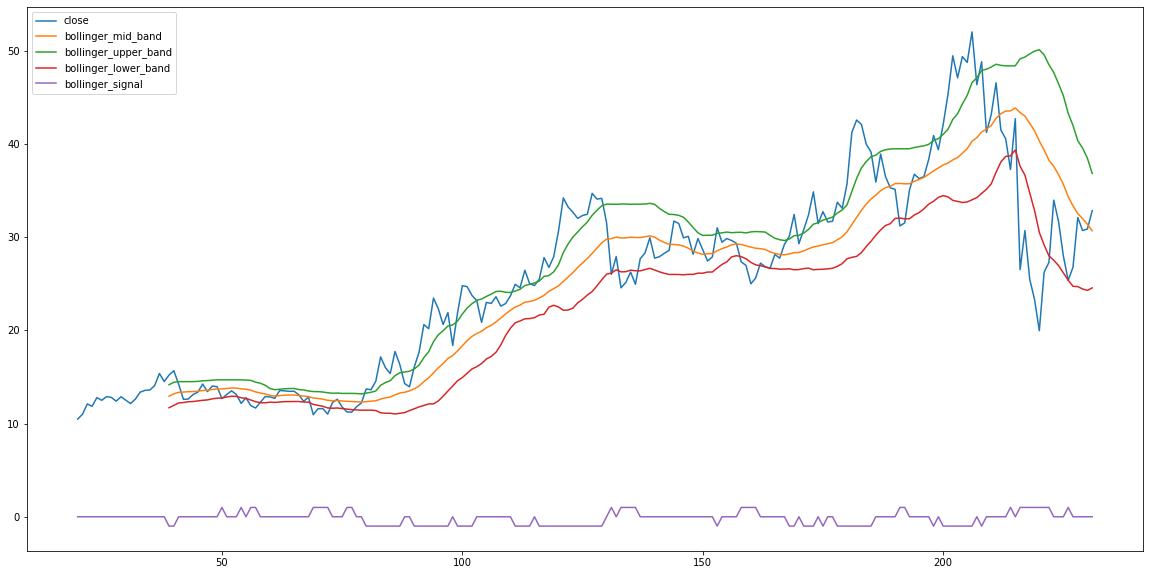

In [75]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [76]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']


historical_prices_df.head(50)

,timestamp,open,high,low,close,volume,date,daily_return,bollinger_mid_band,bollinger_std,...,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
20,1604448000000,10.26869,10.72048,9.79000,10.47369,4574.284689,2020-11-04,0.002439,NaN,NaN,...,10.473690,10.473690,10.473690,10.473690,0.0,0.0,0.0,0.0,0.0,0.0
21,1604534400000,10.51374,11.24761,10.13651,10.99343,10851.563346,2020-11-05,0.049623,NaN,NaN,...,10.743562,10.738063,10.735361,10.734010,1.0,0.0,1.0,1.0,0.0,1.0
22,1604620800000,11.03000,12.96660,11.03000,12.10049,3667.469079,2020-11-06,0.100702,NaN,NaN,...,11.231119,11.208032,11.196727,11.191083,1.0,0.0,1.0,1.0,0.0,1.0
23,1604707200000,12.37333,13.41661,11.50000,11.84772,8003.792164,2020-11-07,-0.020889,NaN,NaN,...,11.403507,11.376361,11.362875,11.356097,1.0,0.0,1.0,1.0,0.0,1.0
24,1604793600000,11.57141,13.05572,11.50000,12.78295,6825.715837,2020-11-08,0.078938,NaN,NaN,...,11.723438,11.677508,11.654818,11.643449,1.0,0.0,1.0,1.0,0.0,1.0
25,1604880000000,12.57657,12.90424,11.70229,12.48769,7925.205462,2020-11-09,-0.023098,NaN,NaN,...,11.876531,11.824502,11.798485,11.785378,1.0,0.0,1.0,1.0,0.0,1.0
26,1604966400000,12.45943,13.23414,12.25001,12.88586,7088.213302,2020-11-10,0.031885,NaN,NaN,...,12.056062,11.992335,11.960359,11.944229,1.0,0.0,1.0,1.0,0.0,1.0
27,1605052800000,13.25628,13.40000,12.80469,12.80469,7810.417635,2020-11-11,-0.006299,NaN,NaN,...,12.176705,12.106614,12.071092,12.053096,1.0,0.0,1.0,1.0,0.0,1.0
28,1605139200000,12.70124,13.05546,11.65000,12.39484,36068.731870,2020-11-12,-0.032008,NaN,NaN,...,12.209044,12.143254,12.109090,12.091596,1.0,0.0,1.0,1.0,0.0,1.0
29,1605225600000,12.53646,12.94997,12.49680,12.86906,2050.201119,2020-11-13,0.038259,NaN,NaN,...,12.300139,12.227666,12.189915,12.170560,1.0,0.0,1.0,1.0,0.0,1.0


<AxesSubplot:>

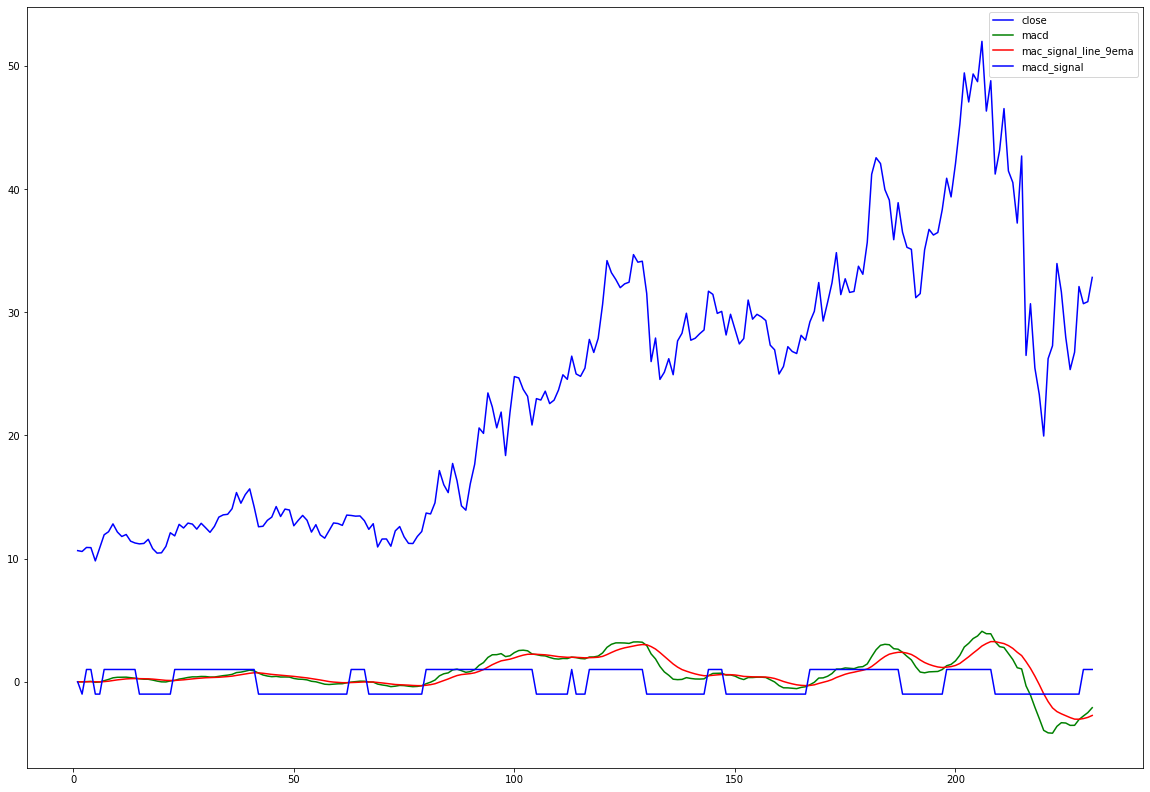

In [63]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [77]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + RSI + BB <br />
 > Strategy 2 = EMA50v200 + RSI + MACD <br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [88]:
# Set x variable list of features
st1_x_var_list = ['crossover_signal_50v200', 'bollinger_signal'] #'rsi_signal',
st2_x_var_list = ['crossover_signal_50v200', 'macd_signal'] #'rsi_signal',
# st3_x_var_list = ['crossover_signal_50v200', 'crossover_signal_9v20', 'macd_signal']
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]
strategy_1['buy/sell'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == 2, 1.0, 0.0)
strategy_1['buy/sell'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == -1, -1.0, 0.0)
strategy_1.iloc[30:60]

,crossover_signal_50v200,bollinger_signal,buy/sell
50,1.0,1.0,0.0
51,1.0,0.0,0.0
52,1.0,0.0,0.0
53,1.0,0.0,0.0
54,1.0,1.0,0.0
55,1.0,0.0,0.0
56,1.0,1.0,0.0
57,1.0,1.0,0.0
58,1.0,0.0,0.0
59,1.0,0.0,0.0


In [81]:
signals_df = historical_prices_df.loc[:, ['date', 'close', 'crossover_signal_50v200', 'bollinger_signal']].copy()

# Set the `date` column as the index
signals_df = signals_df.set_index("date", drop=True)

signals_df['Entry/Exit'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == 2, 1.0, 0.0)

#signals_df.dropna(subset = ["SMA50", "SMA100", "Entry/Exit"], inplace=True)

# Print the DataFrame
signals_df.head(100)

,close,crossover_signal_50v200,bollinger_signal,Entry/Exit
date,,,,
2020-11-04,10.47369,0.0,0.0,0.0
2020-11-05,10.99343,1.0,0.0,0.0
2020-11-06,12.10049,1.0,0.0,0.0
2020-11-07,11.84772,1.0,0.0,0.0
2020-11-08,12.78295,1.0,0.0,0.0
...,...,...,...,...
2021-02-07,24.80213,1.0,0.0,0.0
2021-02-08,25.47046,1.0,-1.0,0.0
2021-02-09,27.80000,1.0,-1.0,0.0


In [84]:
## Backtest the Trading Strategy

# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df['Position'] = share_size * signals_df['Entry/Exit']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position'] = signals_df['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings'] = signals_df['close'] * signals_df['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash'] = initial_capital - (signals_df['close'] * signals_df['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

# Print the DataFrame
signals_df.tail(10)

,close,crossover_signal_50v200,bollinger_signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
date,,,,,,,,,,,
2021-05-25,27.28501,1.0,1.0,1.0,500.0,0.0,13642.505,94883.385,108525.890,0.004845,0.085259
2021-05-26,33.96000,1.0,0.0,0.0,0.0,-500.0,0.000,111863.385,111863.385,0.030753,0.118634
2021-05-27,31.66111,1.0,0.0,0.0,0.0,0.0,0.000,111863.385,111863.385,0.000000,0.118634
2021-05-28,27.96737,1.0,0.0,0.0,0.0,0.0,0.000,111863.385,111863.385,0.000000,0.118634
2021-05-29,25.35096,1.0,1.0,1.0,500.0,500.0,12675.480,99187.905,111863.385,0.000000,0.118634
2021-05-30,26.76105,1.0,0.0,0.0,0.0,-500.0,0.000,112568.430,112568.430,0.006303,0.125684
2021-05-31,32.09140,1.0,0.0,0.0,0.0,0.0,0.000,112568.430,112568.430,0.000000,0.125684
2021-06-01,30.70134,1.0,0.0,0.0,0.0,0.0,0.000,112568.430,112568.430,0.000000,0.125684
2021-06-02,30.86564,1.0,0.0,0.0,0.0,0.0,0.000,112568.430,112568.430,0.000000,0.125684


In [85]:
#Plot Entry/Exit Points of Backtest Results


# Visualize exit position relative to total portfolio value
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                    :Curve   [date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [date]   (Portfolio Total)